# Wikipedia Pageviews Analysis Guided Project - By SenMuthiya

## Overview

In this project, you will use Python and Google BigQuery to analyze Wikipedia pageviews for a specific time period. We'll leverage the capabilities of Google Colab for seamless integration with BigQuery and powerful data analysis using Python.

### Objectives

1. Authenticate to Google Colab and BigQuery.
2. Explore the available dataset in BigQuery (e.g., `bigquery-public-data.wikipedia.pageviews_2024`).
3. Write and execute SQL queries to extract relevant data.
4. Perform exploratory data analysis using Pandas and Matplotlib.
5. Create visualizations, such as histograms, time series plots, word clouds, and more.
6. Gain insights into Wikipedia pageviews trends and patterns.

# Import Necessary Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from google.colab import auth
from google.cloud import bigquery

### Authenticate Google Colab and BigQuery | Create a BigQuery Client


In [3]:
auth.authenticate_user()

# Replace 'your-project-id' with your actual Google Cloud project ID
project_id = 'your-project-id'

# Create a BigQuery client
client = bigquery.Client(project=project_id)


## Explore the Available Dataset
1. Explore the available datasets and tables in BigQuery. Choose a relevant table for your analysis, e.g., bigquery-public-data.wikipedia.pageviews_2024

2. Write and Execute SQL Queries

In [57]:
# Reference to the table
table_ref = client.dataset('wikipedia', project='bigquery-public-data').table('pageviews_2024')

from google.api_core.exceptions import Forbidden
try:
    query = f'''
    SELECT *
    FROM `{table_ref}`
    WHERE datehour BETWEEN TIMESTAMP('2024-01-01 00:00:00') AND TIMESTAMP('2024-01-31 00:00:00')
    LIMIT 1000
'''
    df = client.query(query).to_dataframe()
    # Display the number of records
    # print(f"Number of Records: {len(df)}")
except Forbidden as e:
    print(f"Error: {e}")
    print("Quota exceeded. Please check your BigQuery quota and try again later.")

## Exploratory Data Analysis
Explore the DataFrame (df) using commands such as df.info(), df.describe(), and df.head()

In [58]:
# Display basic info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   datehour  1000 non-null   datetime64[ns, UTC]
 1   wiki      1000 non-null   object             
 2   title     1000 non-null   object             
 3   views     1000 non-null   Int64              
dtypes: Int64(1), datetime64[ns, UTC](1), object(2)
memory usage: 32.4+ KB


In [59]:
# Display summary statistics
df.describe()

,views
count,1000.0
mean,2.573
std,4.459884
min,1.0
25%,1.0
50%,1.0
75%,2.0
max,65.0


In [60]:
df.head()

,datehour,wiki,title,views
0,2024-01-06 00:00:00+00:00,it.m,Pantherophis_guttatus,1
1,2024-01-06 00:00:00+00:00,it.m,Pelargonium_sidoides,1
2,2024-01-06 00:00:00+00:00,it.m,Pete_Gill,1
3,2024-01-06 00:00:00+00:00,it.m,Paraisópolis,1
4,2024-01-06 00:00:00+00:00,it.m,Repubblica_dell'Afghanistan_(1987-1992),1


### Visualizations
Histogram of Article Views

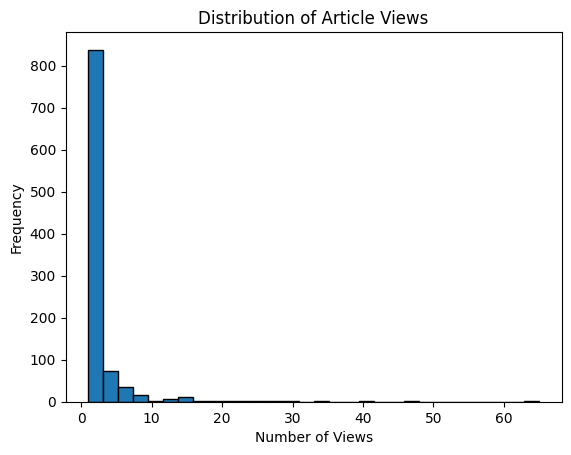

In [67]:
if 'views' in df.columns:
# Example: Plot a histogram of article views
  plt.hist(df['views'], bins=30, edgecolor='black')
  plt.title('Distribution of Article Views')
  plt.xlabel('Number of Views')
  plt.ylabel('Frequency')
  plt.show()
else:
    print('The "views" column does not exist in the dataframe.')

## Find the top 10 most viewed articles

In [90]:
# Example: Find the top 10 most viewed articles
top_viewed_articles = df.groupby('title')['views'].sum().sort_values(ascending=False).head(10)
print("Top 10 Most Viewed Articles:")
print(top_viewed_articles)

Top 10 Most Viewed Articles:
title
Sally_Field                                   65
Ryan_Reynolds                                 50
Romania                                       47
Polonia                                       41
Ri_Sol-ju                                     35
Papa_Paolo_VI                                 35
Ronald_Reagan                                 28
Ricky_Tognazzi                                28
Raimondo_Vianello                             26
Persone_più_ricche_d'Italia_secondo_Forbes    24
Name: views, dtype: int64


### Word Cloud of Top Viewed Articles

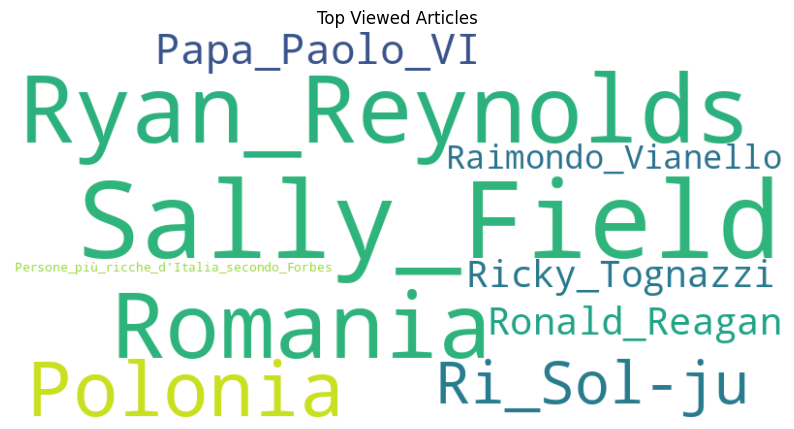

In [87]:

# Group by with the columns 'title' and 'views'
top_viewed_articles = df.groupby('title')['views'].sum().sort_values(ascending=False).head(10)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_viewed_articles)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Viewed Articles')
plt.show()


Happy coding! This guide outlines the necessary steps, provides code snippets, and encourages students to explore and visualize data from Wikipedia pageviews. It's designed to be a comprehensive and hands-on project for learning and applying data analysis skills using Google Colab and BigQuery.